# Project 02 Movielens Case Study

<hr style="border: solid rgb(255,255,255) 1.0px;height: 2.0px;"/>

### <font color=blue>Task 01 : Import the three datasets

In [1]:
import pandas as pd

In [2]:
#Import the ratings, users and movies dataset
dsRatings = pd.read_csv("S:\\SandeepG\\Official\\DataScience\\SimpliLearn\\Data Science with Python\\Projects\\Project 02 - Movielens\\ratings.dat",  sep='::', engine='python', header=None)
dsUsers = pd.read_csv("S:\\SandeepG\\Official\\DataScience\\SimpliLearn\\Data Science with Python\\Projects\\Project 02 - Movielens\\users.dat",  sep='::', engine='python', header=None)
dsMovies = pd.read_csv("S:\\SandeepG\\Official\\DataScience\\SimpliLearn\\Data Science with Python\\Projects\\Project 02 - Movielens\\movies.dat",  sep='::', engine='python', header=None)

In [3]:
# assign headers to all three datasets
dsRatings.columns = ['UserID','MovieID','Rating','Timestamp']
dsUsers.columns = ['UserID','Gender','Age','Occupation','Zip-code']
dsMovies.columns = ['MovieID','Title','Genres']
print(dsRatings.head(), '\n\n')
print(dsUsers.head(), '\n\n')
print(dsMovies.head(), '\n\n')

   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291 


   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455 


   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy 




<hr style="border: solid rgb(255,255,255) 1.0px;height: 2.0px;"/>

### <font color=blue>Task 02 : Create a new dataset Master_Data
    Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. 
    (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

In [4]:
type(dsMovies)

pandas.core.frame.DataFrame

In [5]:
# merging movies and ratings datasetabs
dsMovieRating = pd.merge(dsMovies, dsRatings, how='outer', on=['MovieID', 'MovieID'])

In [6]:
# merging movieRatings dataset with users
dsMovieRatingUsers = pd.merge(dsMovieRating, dsUsers, how='outer', on=['UserID', 'UserID'])

In [7]:
# checking the row counts after merge
print(dsRatings.shape)
print(dsUsers.shape)
print(dsMovies.shape)
print(dsMovieRatingUsers.shape)

(1000209, 4)
(6040, 5)
(3883, 3)
(1000386, 10)


In [8]:
# viewing sample dataset
dsMovieRatingUsers.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1.0,5.0,978824268.0,F,1.0,10.0,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1.0,5.0,978824351.0,F,1.0,10.0,48067
2,150,Apollo 13 (1995),Drama,1.0,5.0,978301777.0,F,1.0,10.0,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1.0,4.0,978300760.0,F,1.0,10.0,48067
4,527,Schindler's List (1993),Drama|War,1.0,5.0,978824195.0,F,1.0,10.0,48067


In [9]:
# create Master_Data with required columns
Master_Data = dsMovieRatingUsers[['MovieID', 'Title', 'UserID','Age','Gender','Occupation','Rating']]

<hr style="border: solid rgb(255,255,255) 1.0px;height: 2.0px;"/>

### <font color=blue>Task 03 : Explore the datasets using visual representations 
    Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
        1.	User Age Distribution
        2.	User rating of the movie “Toy Story”
        3.	Top 25 movies by viewership rating
        4.	Find the ratings for all the movies reviewed by for a particular user of user id = 2696

    

#### <font color=blue>3.1 : Explore User Age Distribution 

In [10]:
# analyze sample data for User Age first
Master_Data['Age']

0           1.0
1           1.0
2           1.0
3           1.0
4           1.0
           ... 
1000381    25.0
1000382    25.0
1000383    25.0
1000384    25.0
1000385    25.0
Name: Age, Length: 1000386, dtype: float64

In [11]:
# grouping all user's age to find pattern, if any
dfAgeCount = Master_Data.groupby(['Age']).count().sort_values(by=['Age'], inplace=False)

In [12]:
dfAgeCount

,MovieID,Title,UserID,Gender,Occupation,Rating
Age,,,,,,
1.0,27211,27211,27211,27211,27211,27211
18.0,183536,183536,183536,183536,183536,183536
25.0,395556,395556,395556,395556,395556,395556
35.0,199003,199003,199003,199003,199003,199003
45.0,83633,83633,83633,83633,83633,83633
50.0,72490,72490,72490,72490,72490,72490
56.0,38780,38780,38780,38780,38780,38780


In [13]:
# let's cut the first column of unique key and put in dictionary for plt iteration
dictAge = dfAgeCount.iloc[:,0].to_dict()

In [14]:
dictAge

{1.0: 27211,
 18.0: 183536,
 25.0: 395556,
 35.0: 199003,
 45.0: 83633,
 50.0: 72490,
 56.0: 38780}

In [15]:
# visualize Age distribution
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

ageValue = dictAge.keys()
y_pos = np.arange(len(ageValue))
ageCounts = dictAge.values()

total = sum(dictAge.values())

# printing the % value per bar 
for index, value in enumerate(ageCounts):
    pctValue = str(round((value/total)*100,2)) + '%'
    plt.text(index, value + (value * 0.01), pctValue)
    
plt.bar(y_pos, ageCounts, align='center', alpha=0.5)
plt.xticks(y_pos, ageValue, rotation=90)
plt.ylabel('Agewise counts')
plt.title('Agewise Distribution')

plt.show()

<Figure size 640x480 with 1 Axes>

### <font color=red> <u>Agewise Conclusion</u> : 
    Above confirms that around 40% of ratings is provided by 25 yrs age group, followed by approx 19% by 35 yrs age group and 18% by 18 yrs age group. Total of 80% (approx) of ratings are received by only three age group (25, 35 and 18)

#### <font color=blue>3.2 : User rating of the movie “Toy Story” 

In [16]:
# view sample data again
Master_Data.head(10)

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1,Toy Story (1995),1.0,1.0,F,10.0,5.0
1,48,Pocahontas (1995),1.0,1.0,F,10.0,5.0
2,150,Apollo 13 (1995),1.0,1.0,F,10.0,5.0
3,260,Star Wars: Episode IV - A New Hope (1977),1.0,1.0,F,10.0,4.0
4,527,Schindler's List (1993),1.0,1.0,F,10.0,5.0
5,531,"Secret Garden, The (1993)",1.0,1.0,F,10.0,4.0
6,588,Aladdin (1992),1.0,1.0,F,10.0,4.0
7,594,Snow White and the Seven Dwarfs (1937),1.0,1.0,F,10.0,4.0
8,595,Beauty and the Beast (1991),1.0,1.0,F,10.0,5.0
9,608,Fargo (1996),1.0,1.0,F,10.0,4.0


In [17]:
# filter rows for movie "Toy Story"
dfToyStory = Master_Data[Master_Data['Title'] == 'Toy Story (1995)']

In [18]:
# see data for filtered dataset (2077 rows found as per below)
dfToyStory

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1,Toy Story (1995),1.0,1.0,F,10.0,5.0
53,1,Toy Story (1995),6.0,50.0,F,9.0,4.0
124,1,Toy Story (1995),8.0,25.0,M,12.0,4.0
263,1,Toy Story (1995),9.0,25.0,M,17.0,5.0
369,1,Toy Story (1995),10.0,35.0,F,1.0,5.0
...,...,...,...,...,...,...,...
575166,1,Toy Story (1995),6022.0,25.0,M,17.0,5.0
575214,1,Toy Story (1995),6025.0,25.0,F,1.0,5.0
575485,1,Toy Story (1995),6032.0,45.0,M,7.0,4.0
575589,1,Toy Story (1995),6035.0,25.0,F,1.0,4.0


In [19]:
# grouping Toy Story rows based on Age and Gender to later represent in a heatmap
dfToyStoryGrouped = dfToyStory.groupby(['Age', 'Rating']).count().sort_values(by=['Rating'], inplace=False, ascending=False).iloc[:,0]

In [20]:
dfToyStoryGrouped

Age   Rating
56.0  5.0        18
50.0  5.0        42
25.0  5.0       324
45.0  5.0        53
18.0  5.0       146
35.0  5.0       203
1.0   5.0        34
50.0  4.0        38
35.0  4.0       154
1.0   4.0        45
45.0  4.0        59
25.0  4.0       332
56.0  4.0        17
18.0  4.0       190
56.0  3.0        13
50.0  3.0        25
45.0  3.0        25
35.0  3.0        60
1.0   3.0        25
25.0  3.0       105
18.0  3.0        92
1.0   2.0         6
35.0  2.0         3
56.0  2.0         4
18.0  2.0        14
50.0  2.0         2
25.0  2.0        27
45.0  2.0         5
50.0  1.0         1
25.0  1.0         2
35.0  1.0         3
56.0  1.0         1
18.0  1.0         6
45.0  1.0         1
1.0   1.0         2
Name: MovieID, dtype: int64

In [21]:
# converting series to dataframe so that it can be visualized in heatmap
dfToyStoryGrouped = pd.DataFrame(dfToyStoryGrouped)

# renaming aggregate column
dfToyStoryGrouped.rename(columns = {'MovieID': 'Rating Count'}, inplace=True)

dfToyStoryGrouped

,,Rating Count
Age,Rating,
56.0,5.0,18
50.0,5.0,42
25.0,5.0,324
45.0,5.0,53
18.0,5.0,146
35.0,5.0,203
1.0,5.0,34
50.0,4.0,38
35.0,4.0,154


In [22]:
# store data in pivot to use it for generating heatmap
heatmap_data = pd.pivot_table(dfToyStoryGrouped, values= 'Rating Count', 
                     index=['Rating'], 
                     columns='Age')

heatmap_data.sort_values(by=['Rating'], inplace=True, ascending=False)

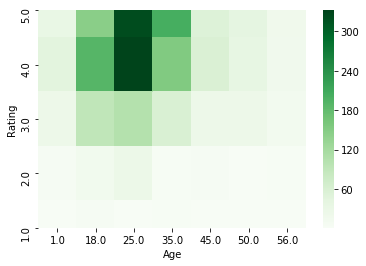

In [23]:
import seaborn as sns
sns.heatmap(heatmap_data, cmap="Greens")

### <font color=red> <u>ToyStory Conclusion</u> : 
    Above confirms that Toy Story movie is liked by the major age group (18, 25 and 35) and has given rating of 4 and above.

#### <font color=blue>3.3 : Top 25 movies by viewership rating

In [24]:
# this is tricky. we can do a sum of ratings per movie and take 25 topmost. 
# But that won't be correct, since there can be 50% of users who rated a specific movie as 1 rating 
# but since the no of users is high, the sum of rating would be high providing incorrect conclusion.

# instead, we will take the mean of rating and see the no of users that have provided the rating and 
# then make final conclusion.

# for now, let's see sample data again
Master_Data

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1,Toy Story (1995),1.0,1.0,F,10.0,5.0
1,48,Pocahontas (1995),1.0,1.0,F,10.0,5.0
2,150,Apollo 13 (1995),1.0,1.0,F,10.0,5.0
3,260,Star Wars: Episode IV - A New Hope (1977),1.0,1.0,F,10.0,4.0
4,527,Schindler's List (1993),1.0,1.0,F,10.0,5.0
...,...,...,...,...,...,...,...
1000381,3513,Rules of Engagement (2000),5727.0,25.0,M,4.0,4.0
1000382,3535,American Psycho (2000),5727.0,25.0,M,4.0,2.0
1000383,3536,Keeping the Faith (2000),5727.0,25.0,M,4.0,5.0
1000384,3555,U-571 (2000),5727.0,25.0,M,4.0,3.0


In [25]:
dfTitleCount = Master_Data.groupby(['Title']).count().sort_values(by=['Rating'], inplace=False, ascending=False)

In [26]:
# below is the list of 25 movies that have been rated
dfTitleCount.head(25)

,MovieID,UserID,Age,Gender,Occupation,Rating
Title,,,,,,
American Beauty (1999),3428,3428,3428,3428,3428,3428
Star Wars: Episode IV - A New Hope (1977),2991,2991,2991,2991,2991,2991
Star Wars: Episode V - The Empire Strikes Back (1980),2990,2990,2990,2990,2990,2990
Star Wars: Episode VI - Return of the Jedi (1983),2883,2883,2883,2883,2883,2883
Jurassic Park (1993),2672,2672,2672,2672,2672,2672
Saving Private Ryan (1998),2653,2653,2653,2653,2653,2653
Terminator 2: Judgment Day (1991),2649,2649,2649,2649,2649,2649
"Matrix, The (1999)",2590,2590,2590,2590,2590,2590
Back to the Future (1985),2583,2583,2583,2583,2583,2583


In [27]:
# group by Title
# take count and mean
# sort by count i.e. no of users that rated any movie in desc
dfTitleCount = Master_Data[['Title','Rating']] \
                .groupby('Title') \
                .agg(['count','mean']) \
                .sort_values(('Rating', 'count'), inplace=False, ascending=False)

In [28]:
# dfTitleCount is sorted in desc order of count, taking top 25 records as required
dfTitleCount.head(25)

Rating          
                                                    count      mean
Title                                                              
American Beauty (1999)                               3428  4.317386
Star Wars: Episode IV - A New Hope (1977)            2991  4.453694
Star Wars: Episode V - The Empire Strikes Back ...   2990  4.292977
Star Wars: Episode VI - Return of the Jedi (1983)    2883  4.022893
Jurassic Park (1993)                                 2672  3.763847
Saving Private Ryan (1998)                           2653  4.337354
Terminator 2: Judgment Day (1991)                    2649  4.058513
Matrix, The (1999)                                   2590  4.315830
Back to the Future (1985)                            2583  3.990321
Silence of the Lambs, The (1991)                     2578  4.351823
Men in Black (1997)                                  2538  3.739953
Raiders of the Lost Ark (1981)                       2514  4.477725
Fargo (1996)                                         2513  4.254676
Sixth Sense, The (1999)                              2459  4.406263
Braveheart (1995)                                    2443  4.234957
Shakespeare in Love (1998)                           2369  4.127480
Princess Bride, The (1987)                           2318  4.303710
Schindler's List (1993)                              2304  4.510417
L.A. Confidential (1997)                             2288  4.219406
Groundhog Day (1993)                                 2278  3.953029
E.T. the Extra-Terrestrial (1982)                    2269  3.965183
Star Wars: Episode I - The Phantom Menace (1999)     2250  3.409778
Being John Malkovich (1999)                          2241  4.125390
Shawshank Redemption, The (1994)                     2227  4.554558
Godfather, The (1972)                                2223  4.524966

### <font color=red> <u>Top 25 Movies Conclusion </u> : 
    Above lists the top 25 movies and their corresponding rating

#### <font color=blue>3.4 : Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [29]:
# let's see sample data again
Master_Data

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1,Toy Story (1995),1.0,1.0,F,10.0,5.0
1,48,Pocahontas (1995),1.0,1.0,F,10.0,5.0
2,150,Apollo 13 (1995),1.0,1.0,F,10.0,5.0
3,260,Star Wars: Episode IV - A New Hope (1977),1.0,1.0,F,10.0,4.0
4,527,Schindler's List (1993),1.0,1.0,F,10.0,5.0
...,...,...,...,...,...,...,...
1000381,3513,Rules of Engagement (2000),5727.0,25.0,M,4.0,4.0
1000382,3535,American Psycho (2000),5727.0,25.0,M,4.0,2.0
1000383,3536,Keeping the Faith (2000),5727.0,25.0,M,4.0,5.0
1000384,3555,U-571 (2000),5727.0,25.0,M,4.0,3.0


In [30]:
# filter rows for user id = 2696
dfUser2696 = Master_Data[Master_Data['UserID'] == 2696]

In [31]:
dfUser2696

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
991212,350,"Client, The (1994)",2696.0,25.0,M,7.0,3.0
991213,800,Lone Star (1996),2696.0,25.0,M,7.0,5.0
991214,1092,Basic Instinct (1992),2696.0,25.0,M,7.0,4.0
991215,1097,E.T. the Extra-Terrestrial (1982),2696.0,25.0,M,7.0,3.0
991216,1258,"Shining, The (1980)",2696.0,25.0,M,7.0,4.0
991217,1270,Back to the Future (1985),2696.0,25.0,M,7.0,2.0
991218,1589,Cop Land (1997),2696.0,25.0,M,7.0,3.0
991219,1617,L.A. Confidential (1997),2696.0,25.0,M,7.0,4.0
991220,1625,"Game, The (1997)",2696.0,25.0,M,7.0,4.0
991221,1644,I Know What You Did Last Summer (1997),2696.0,25.0,M,7.0,2.0


<hr style="border: solid rgb(255,255,255) 1.0px;height: 2.0px;"/>

### <font color=blue>Task 04 : Feature Engineering
    
    •	Feature Engineering:
        
        Use column genres:
        
        1.	Find out all the unique genres (Hint: split the data in column genre making a list and then process the datato
        find out only the unique categories of genres)
        
        2.	Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie
        belongs to that genre. 
        
        3.	Determine the features affecting the ratings of any particular movie.
        
        4.	Develop an appropriate model to predict the movie ratings


#### <font color=blue>4.1 : Find out all the unique genres

In [32]:
# let's see sample data again
Master_Data

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1,Toy Story (1995),1.0,1.0,F,10.0,5.0
1,48,Pocahontas (1995),1.0,1.0,F,10.0,5.0
2,150,Apollo 13 (1995),1.0,1.0,F,10.0,5.0
3,260,Star Wars: Episode IV - A New Hope (1977),1.0,1.0,F,10.0,4.0
4,527,Schindler's List (1993),1.0,1.0,F,10.0,5.0
...,...,...,...,...,...,...,...
1000381,3513,Rules of Engagement (2000),5727.0,25.0,M,4.0,4.0
1000382,3535,American Psycho (2000),5727.0,25.0,M,4.0,2.0
1000383,3536,Keeping the Faith (2000),5727.0,25.0,M,4.0,5.0
1000384,3555,U-571 (2000),5727.0,25.0,M,4.0,3.0


In [33]:
# confirming the type before applying split opertaion to extract unique values
type(dsMovies['Genres'])

pandas.core.series.Series

In [34]:
# applying split to convert delimited values into a series
dfGenre = dsMovies['Genres'].str.split('|', expand=True)
# applying ravel to flatten the arrary and then unique to get unique values
uniqueGenres = pd.unique(dfGenre.values.ravel())
uniqueGenres

array(['Animation', "Children's", 'Comedy', None, 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

### <font color=red> <u>All Unique Genres</u> : 
    Above lists all unique genres.

#### <font color=blue>4.2 : Separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 

In [35]:
# dsGenresOHK - One Hot Key
dfGenresOHK = pd.DataFrame(dsMovies['Genres']).Genres.str.get_dummies(sep='|')
dfGenresOHK

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3880,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3881,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [36]:
dsMoviesOHK = dsMovies.merge(dfGenresOHK, left_index=True, right_index=True)
dsMoviesOHK

,MovieID,Title,Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3879,3949,Requiem for a Dream (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3880,3950,Tigerland (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3881,3951,Two Family House (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
dsMoviesOHK

,MovieID,Title,Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3879,3949,Requiem for a Dream (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3880,3950,Tigerland (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3881,3951,Two Family House (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
Master_DataOHK = pd.merge(Master_Data, dsMoviesOHK, how='inner', on=['MovieID', 'MovieID'])
Master_DataOHK

,MovieID,Title_x,UserID,Age,Gender,Occupation,Rating,Title_y,Genres,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1.0,1.0,F,10.0,5.0,Toy Story (1995),Animation|Children's|Comedy,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story (1995),6.0,50.0,F,9.0,4.0,Toy Story (1995),Animation|Children's|Comedy,0,...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story (1995),8.0,25.0,M,12.0,4.0,Toy Story (1995),Animation|Children's|Comedy,0,...,0,0,0,0,0,0,0,0,0,0
3,1,Toy Story (1995),9.0,25.0,M,17.0,5.0,Toy Story (1995),Animation|Children's|Comedy,0,...,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story (1995),10.0,35.0,F,1.0,5.0,Toy Story (1995),Animation|Children's|Comedy,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000381,3280,"Baby, The (1973)",46.0,18.0,M,19.0,5.0,"Baby, The (1973)",Horror,0,...,0,0,1,0,0,0,0,0,0,0
1000382,642,Roula (1995),2130.0,45.0,M,0.0,2.0,Roula (1995),Drama,0,...,0,0,0,0,0,0,0,0,0,0
1000383,1915,Voyage to the Beginning of the World (1997),2440.0,50.0,M,17.0,4.0,Voyage to the Beginning of the World (1997),Drama,0,...,0,0,0,0,0,0,0,0,0,0
1000384,3779,Project Moon Base (1953),3338.0,45.0,M,16.0,3.0,Project Moon Base (1953),Sci-Fi,0,...,0,0,0,0,0,0,1,0,0,0


### <font color=red> <u>Genre category with a one-hot encoding</u> : 
    Above lists all genres with one-hot encoding

#### <font color=blue>4.3 : Determine the features affecting the ratings of any particular movie.

In [39]:
# let't try to group by rating and sum up one-hot encoding value to derive relationship, if any
dfGenreRating = Master_DataOHK.groupby(['Genres']).agg({'Rating':'mean'}).sort_values(by=['Rating'], inplace=False, ascending=False)

In [40]:
# let's display the top 10 Genres that has received best mean rating
dfGenreRating.head(10)

,Rating
Genres,
Animation|Comedy|Thriller,4.473837
Sci-Fi|War,4.449890
Animation,4.394336
Film-Noir|Mystery,4.367424
Adventure|War,4.346107
Film-Noir|Romance|Thriller,4.294382
Action|Adventure|Drama|Sci-Fi|War,4.292977
Film-Noir|Sci-Fi,4.273333
Crime|Film-Noir,4.264129


In [41]:
# let's display the top 10 Genres that has received WORST mean rating
dfGenreRating.tail(10)

,Rating
Genres,
Action|Children's|Fantasy,2.389517
Action|Adventure|Children's|Comedy,2.306950
Action|Adventure|Comedy|War,2.276995
Action|Adventure|Mystery|Sci-Fi,2.238938
Action|Sci-Fi|Western,2.158537
Action|Adventure|Children's|Fantasy,2.090909
Comedy|Film-Noir|Thriller,2.000000
Action|Adventure|Children's|Sci-Fi,1.874286
Action|Children's,1.742373


### <font color=red> <u>Features affecting the ratings of any particular movie</u> : 
    Above two table list the combination of genres that are most liked and most disliked by users.

#### <font color=blue>4.4 : Develop an appropriate model to predict the movie ratings

In [42]:
#Select features from the dataset to create the model
selectedFeatures = list(filter(None, uniqueGenres))

In [43]:
# print all features
selectedFeatures

['Animation',
 "Children's",
 'Comedy',
 'Adventure',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Sci-Fi',
 'Documentary',
 'War',
 'Musical',
 'Mystery',
 'Film-Noir',
 'Western']

In [44]:
# to predict Rating, we need to drop rows that has Rating as NaN
Master_DataOHK.dropna(subset=['Rating'], inplace = True)

In [45]:
#Create the feature object
X_features = Master_DataOHK[selectedFeatures]

In [46]:
#Create the reponse object
Y_target = Master_DataOHK['Rating']

In [47]:
#View the shape of the feature object
X_features.shape

(1000209, 18)

In [48]:
#View the shape of the target object
Y_target.shape

(1000209,)

In [49]:
#Split the dataset to test and train the model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_features, Y_target)

In [50]:
# Create a logistic regression model using the training set
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
#Make predictions using the testing set
Y_predict = logReg.predict(X_test)

In [52]:
#Evaluate the accuracy of your model
from sklearn import metrics
print(metrics.accuracy_score(Y_test, Y_predict))

0.34942592170459863


### <font color=red> <u>Logistic Regression Conclusion</u> : 
    Accuracy score for Logistic Regression is 34%.

<hr style="border: solid rgb(255,255,255) 1.0px;height: 2.0px;"/>